In [9]:
import sklearn.metrics as skm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from analysis_utils import *
from nlp_synt_data import *
from data.texts import *
from data.training import *
from sc import *

In [10]:
df = pd.read_json('data/dbdump_testdb.jobs_v5.json')
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df = df[df['company'].str.contains('ecco')]
# df['description'].unique().tolist()
# df[df['description'].str.contains('contattato')]['description'].unique().tolist()

/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_76057/2113680643.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [11]:
df = pd.read_csv('data/job_description_seed_dataset_improved_context.csv')
df['len'] = df.apply(lambda x: len(x['text']), axis=1)
# df.sort_values('len', ascending=False, inplace=True)
# df[df['inclusive phrasing'] == 'NO'].head(100)['text'].iloc[14]
df.sort_values(by=['len'],ascending=False).head()['text'].to_list()
_map = {
    'YES': 'INCLUSIVO',
    'NO': 'NON INCLUSIVO'
}
df['label'] = df.apply(lambda x: _map[x['inclusive phrasing']], axis=1)
# df[['text','label']].values.tolist()

#TEXT_SEED_v0()
# df[(df['len'] >= 700) & (df['len'] <= 10000)]['text'].unique()

In [12]:
df = pd.read_csv('data/raw_data_finetune_train.csv')
df['text_JOB_value'] = df.apply(lambda x: x['text_JOB_value'] if isinstance(x['text_JOB_value'],str) else "", axis=1)
df['text_ADJ_value'] = df.apply(lambda x: x['text_ADJ_value'] if isinstance(x['text_ADJ_value'],str) else "", axis=1)
df['text_VERB_value'] = df.apply(lambda x: x['text_VERB_value'] if isinstance(x['text_VERB_value'],str) else "", axis=1)
df_jobs = df[df['text_JOB_value'] != ""]
df_adj = df[df['text_ADJ_value'] != ""]
df_verb = df[df['text_VERB_value'] != ""]
df_other = df[(df['text_JOB_value'] == "") & (df['text_ADJ_value'] == "") & (df['text_VERB_value'] == "")]
tot = len(df)
# tot, len(df_jobs)/tot, len(df_adj)/tot, len(df_verb)/tot, len(df_other)/tot

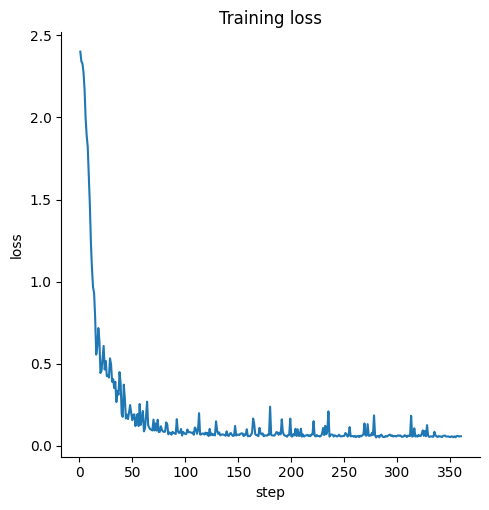

In [13]:
df_loss = pd.DataFrame({
    'step': [int(ln.split('	')[0]) for ln in TRAINING_LOSS.split('\n')],
    'loss': [float(ln.split('	')[1]) for ln in TRAINING_LOSS.split('\n')],
})
sns.relplot(data=df_loss, x='step', y='loss', kind='line')
plt.title('Training loss')
plt.show()

In [14]:
pd.read_csv(sc_csv_name("phi3", False, False))

,prompt_id,text,text_labels,response,text_JOB_value,text_ADJ_value,text_JOB_label,text_ADJ_label
0,zsl#0,"tnservice srl, agenzia per il lavoro (aut. min...",INCLUSIVO,INCLUSIVO,NaN,NaN,NaN,NaN
1,zsl#0,per nostro cliente specializzato nel settore t...,TODO,INCLUSIVO,giornaista,NaN,neutro,NaN
2,zsl#0,per nostro cliente specializzato nel settore t...,TODO,"INCLUSIVO\n\n\nLa frase ""per nostro cliente s...",autista,NaN,neutro,NaN
3,zsl#0,per nostro cliente specializzato nel settore t...,TODO,INCLUSIVO,dentista,NaN,neutro,NaN
4,zsl#0,per nostro cliente specializzato nel settore t...,TODO,INCLUSIVO,ginnasta,NaN,neutro,NaN
...,...,...,...,...,...,...,...,...
10419,fsl#0,Il profilo ideale è addetta che: \nHa consegui...,TODO,INCLUSIVO,addetta,NaN,femminile,NaN
10420,fsl#0,Il profilo ideale è addett* che: \nHa consegui...,TODO,INCLUSIVO,addett*,NaN,neutro,NaN
10421,fsl#0,Il profilo ideale è addetto/a che: \nHa conseg...,TODO,INCLUSIVO,addetto/a,NaN,neutro,NaN
10422,fsl#0,Il profilo ideale è consultant che: \nHa conse...,TODO,INCLUSIVO,consultant,NaN,neutro,NaN


In [15]:
df = pd.read_csv(sc_csv_name("phi3", False, False))
df = fix_df(df)
df = fix_df_model_response(df, 'phi3')
df['response'].unique().tolist()

Fixed 0.0, 0 rows


['INCLUSIVO', 'NON INCLUSIVO']

phi3-finetuned
Fixed 0.02, 3 rows
phi3


Fixed 0.0, 0 rows
llama3
Fixed 0.0, 0 rows
mistral
Fixed 0.03, 11 rows
gemma2
Fixed 0.0, 0 rows
qwen2
Fixed 0.0, 1 rows


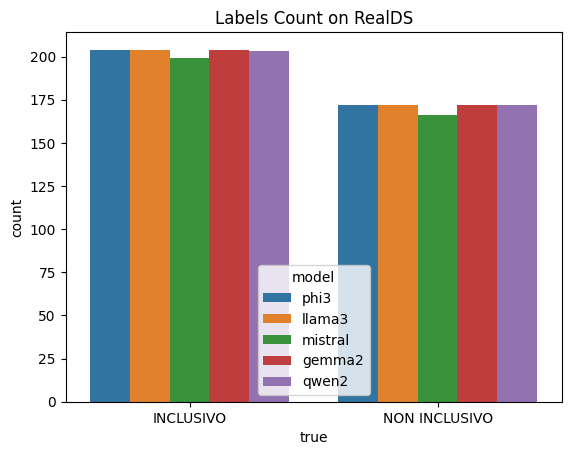

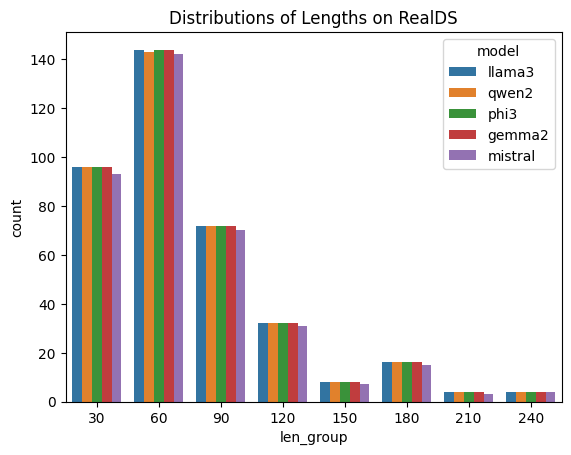

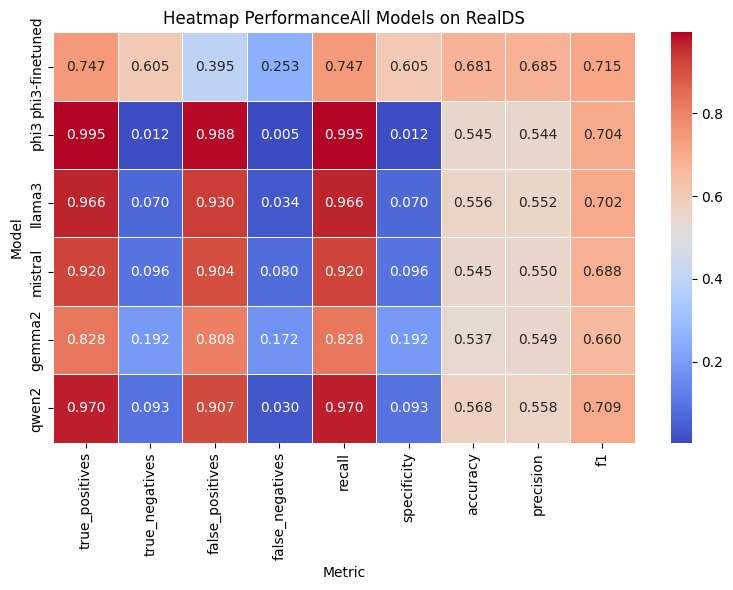

/Users/tommasoromano/Documents/websites/unimi-language-detection/analysis_utils.py:223: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])


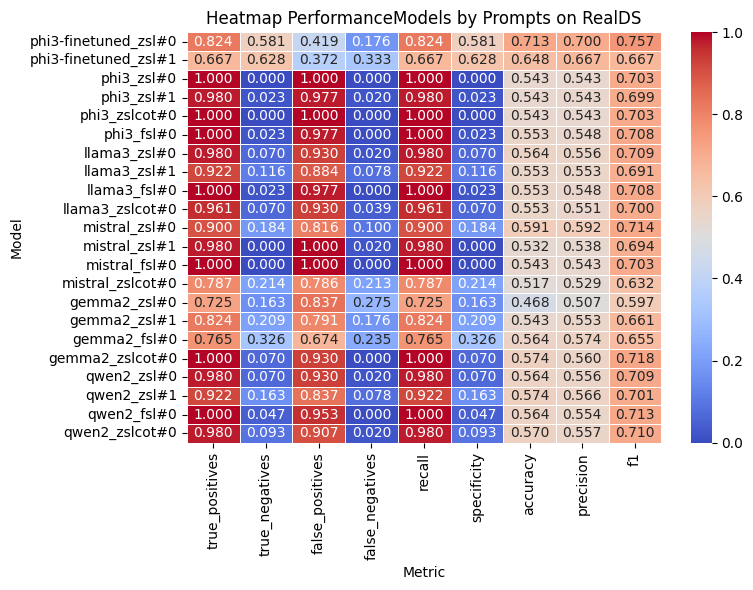

/Users/tommasoromano/Documents/websites/unimi-language-detection/analysis_utils.py:223: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])
/Users/tommasoromano/Documents/websites/unimi-language-detection/analysis_utils.py:223: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])


       name    prompt  precision  accuracy        f1    recall  specificity
2      phi3     zsl#0   0.542553  0.542553  0.703448  1.000000     0.000000
3      phi3     zsl#1   0.543478  0.542553  0.699301  0.980392     0.023256
4      phi3  zslcot#0   0.542553  0.542553  0.703448  1.000000     0.000000
5      phi3     fsl#0   0.548387  0.553191  0.708333  1.000000     0.023256
6    llama3     zsl#0   0.555556  0.563830  0.709220  0.980392     0.069767
7    llama3     zsl#1   0.552941  0.553191  0.691176  0.921569     0.116279
8    llama3     fsl#0   0.548387  0.553191  0.708333  1.000000     0.023256
9    llama3  zslcot#0   0.550562  0.553191  0.700000  0.960784     0.069767
10  mistral     zsl#0   0.592105  0.590909  0.714286  0.900000     0.184211
11  mistral     zsl#1   0.537634  0.531915  0.694444  0.980392     0.000000
12  mistral     fsl#0   0.542553  0.542553  0.703448  1.000000     0.000000
13  mistral  zslcot#0   0.528571  0.516854  0.632479  0.787234     0.214286
14   gemma2 

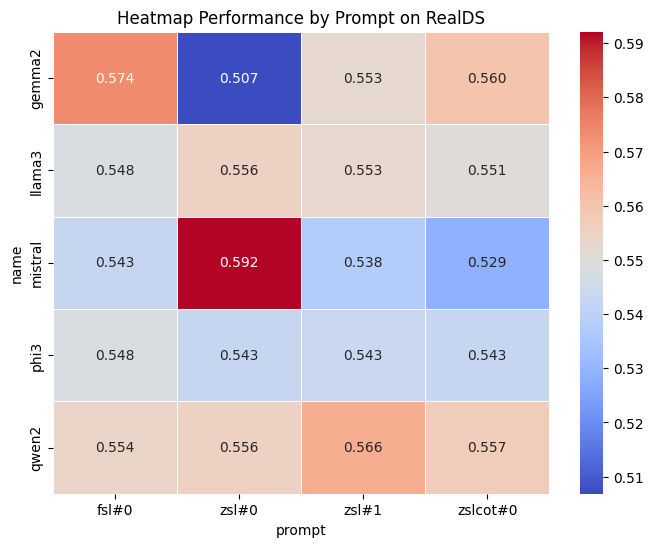

/Users/tommasoromano/Documents/websites/unimi-language-detection/analysis_utils.py:223: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])


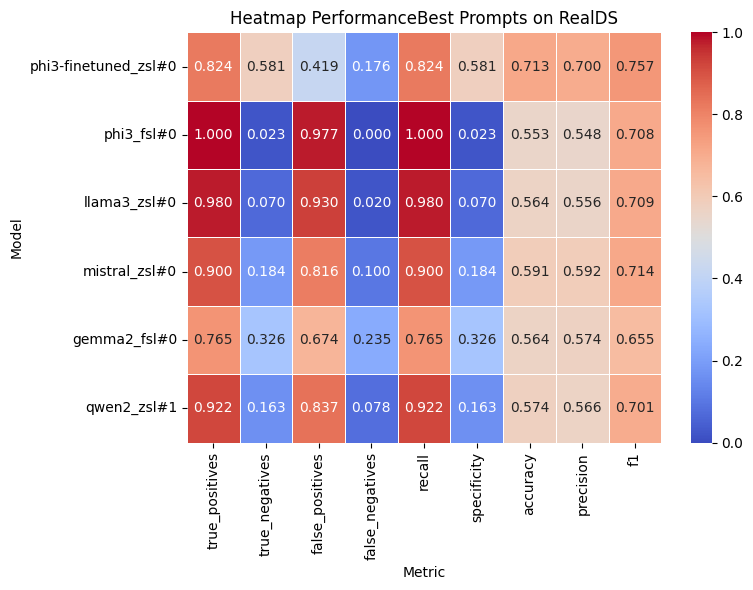

/Users/tommasoromano/Documents/websites/unimi-language-detection/analysis_utils.py:223: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])


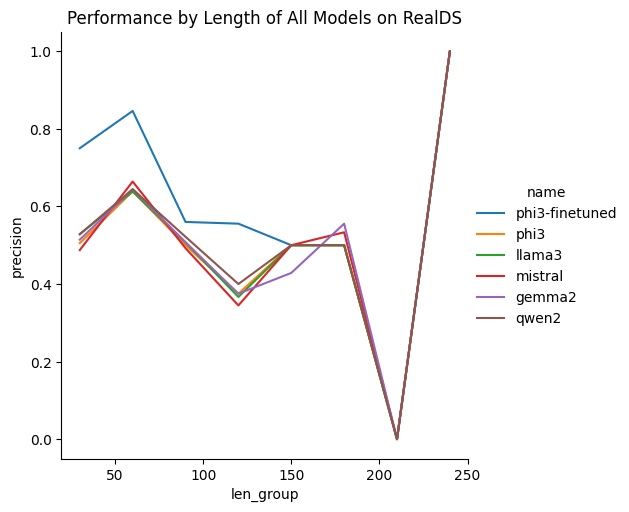

/Users/tommasoromano/Documents/websites/unimi-language-detection/analysis_utils.py:223: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])


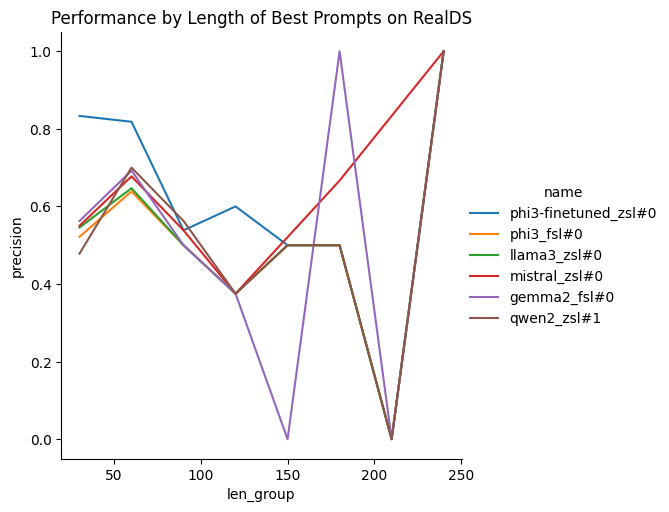

/Users/tommasoromano/Documents/websites/unimi-language-detection/analysis_utils.py:223: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])


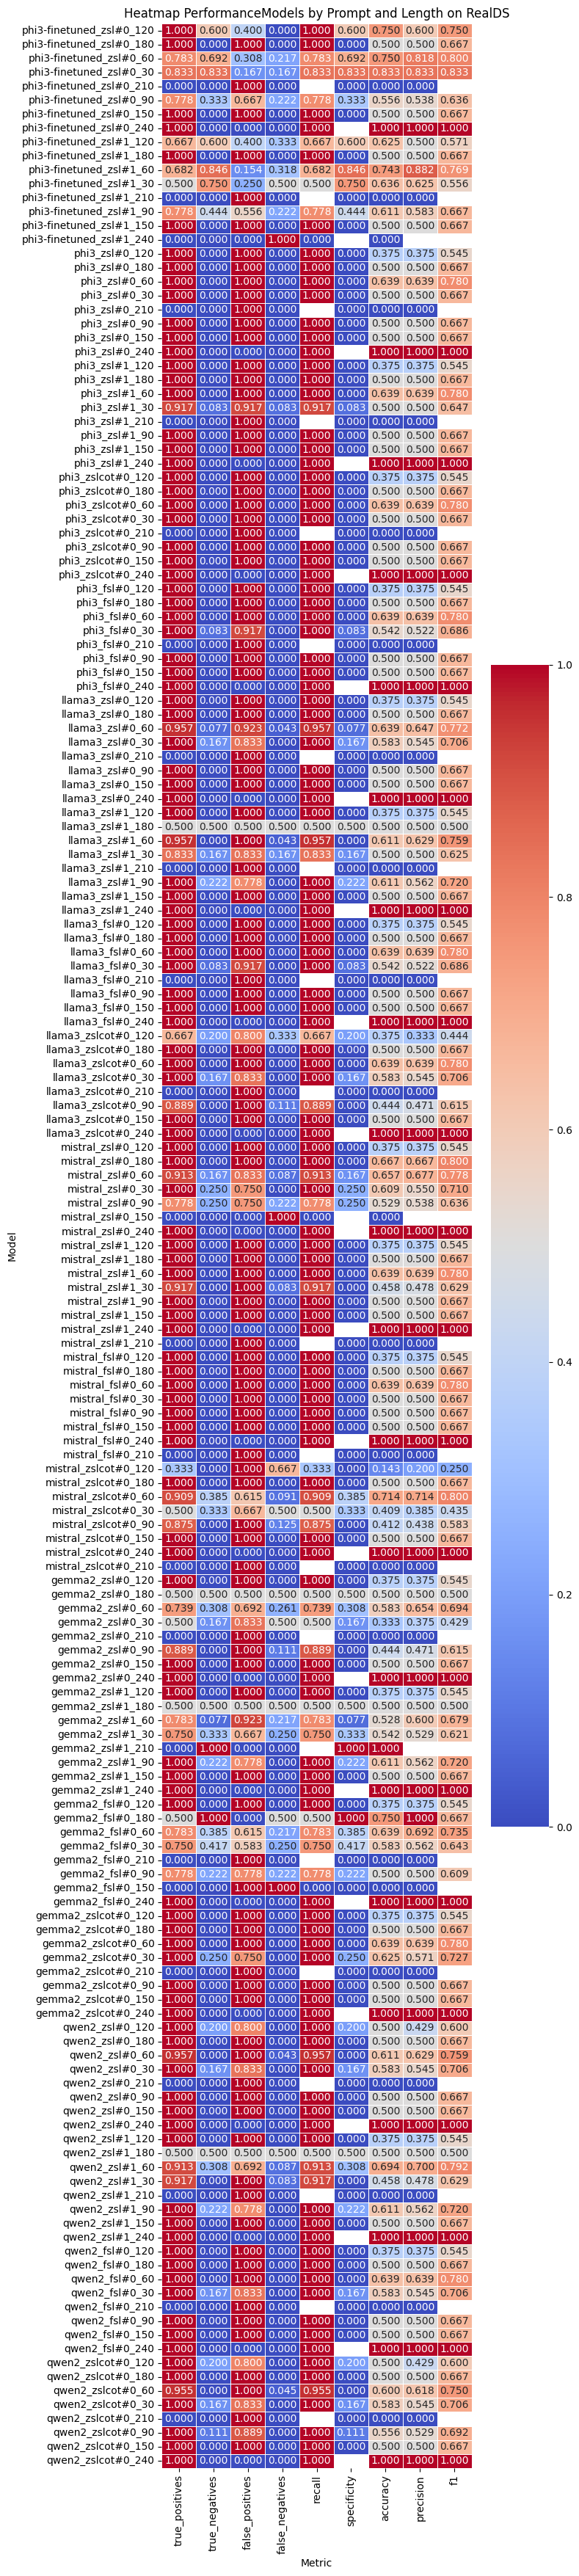

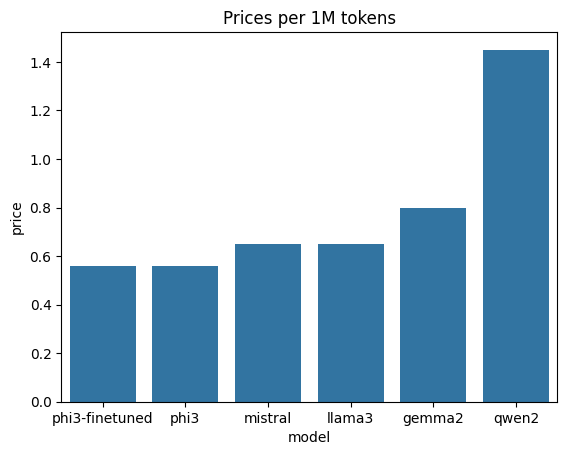

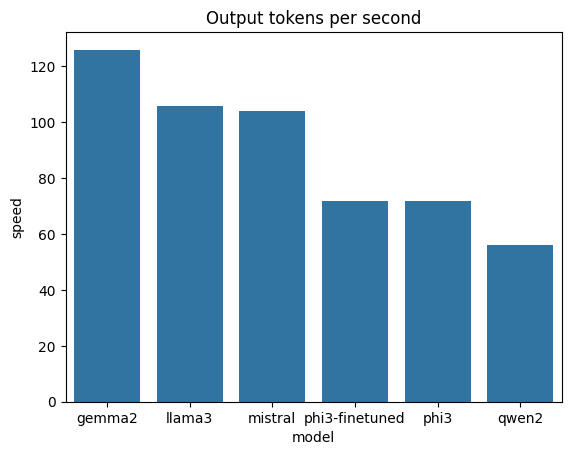

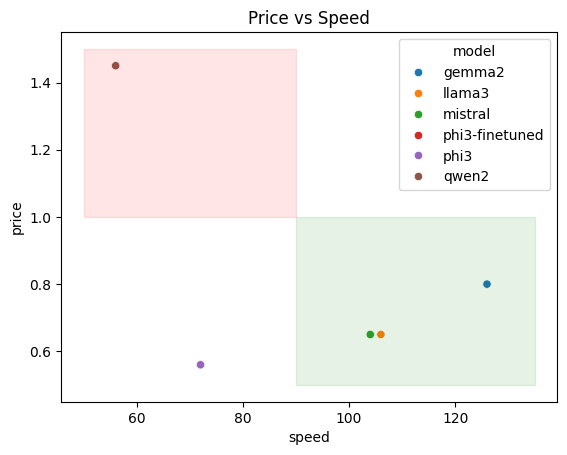

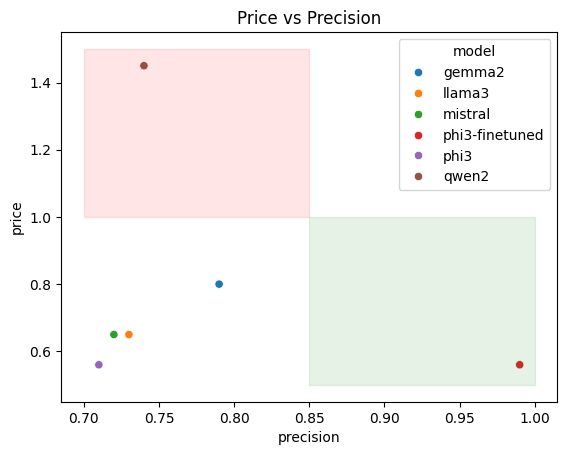

AssertionError: 

In [16]:
IS_SEED = True
ds_text = " on SyntDS" if not IS_SEED else " on RealDS"

dfs_all ,dfs_by_len ,dfs_by_prompt ,dfs_by_pl = make_all_dfs(is_seed=IS_SEED)

df_all = merge_dfs(dfs_all)
df_all_not_finetuned = merge_dfs([x for x in dfs_all if 'finetuned' not in x[1]])
# df_by_len = merge_dfs(dfs_by_len)
# df_by_prompt = merge_dfs(dfs_by_prompt)

plot_labels_by_model(df_all_not_finetuned, title=ds_text)
plot_len_groups(df_all_not_finetuned, title=ds_text)

heatmap_of_performance(dfs_all, title="  All Models" + ds_text)
heatmap_of_performance(dfs_by_prompt, title="Models by Prompts" + ds_text)
plot_prompts(dfs_by_prompt, title=ds_text)
heatmap_of_prompts(dfs_by_prompt, title=ds_text)
best_prompts = get_best_prompt(dfs_by_prompt)
dfs_best_all = [(df,nm) for df,nm in dfs_by_prompt if best_prompts[nm.split('_')[0]][0] in nm]
dfs_best_by_len = [(df,nm) for df,nm in dfs_by_pl if best_prompts[nm.split('_')[0]][0] in nm]
heatmap_of_performance(dfs_best_all, title=" Best Prompts" + ds_text)
# heatmap_of_performance(dfs_by_len, title="Models by Length" + ds_text)
plot_len_metrics(dfs_by_len, "precision", 1, title=" All Models" + ds_text)
# heatmap_of_performance(dfs_best_by_len, title="Best Prompts by Length" + ds_text)
plot_len_metrics(dfs_best_by_len, "precision", 2, title=" Best Prompts" + ds_text)
heatmap_of_performance(dfs_by_pl, title=" Models by Prompt and Length" + ds_text)
# plot_len_metrics(dfs_by_pl, "precision", 2, title="Models by Prompt and Length" + ds_text)

plot_general_costs()

assert 1 == 2

In [ ]:
assert 1 == 2

AssertionError: 